<a href="https://colab.research.google.com/github/samakhraim/Drug-Reviews-Analysis-Using-Machine-Learning/blob/main/DrugsReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Preprocessing - Load data and split into training, testing, and validation sets


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Define file paths
input_file = "/content/DrugData/combined_drugsCom.csv"
output_train_file = "/content/DrugData/drugsCom_train.csv"
output_test_file = "/content/DrugData/drugsCom_test.csv"
output_validation_file = "/content/DrugData/drugsCom_validation.csv"

# Read the combined CSV file
df = pd.read_csv(input_file)

# First split: 60% train and 40% (test + validation)
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)

# Second split: 50% of temp_data (20% of total) for test, 50% (20% of total) for validation
test_data, validation_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Save the splits to CSV files
train_data.to_csv(output_train_file, index=False)
test_data.to_csv(output_test_file, index=False)
validation_data.to_csv(output_validation_file, index=False)

# Print Success
print(f"Training data saved to {output_train_file}")
print(f"Testing data saved to {output_test_file}")
print(f"Validation data saved to {output_validation_file}")


Training data saved to /content/DrugData/drugsCom_train.csv
Testing data saved to /content/DrugData/drugsCom_test.csv
Validation data saved to /content/DrugData/drugsCom_validation.csv


# Step 2: Prepare data - Create Binary Target Column (Useful or Not Useful) and prepare features and target


In [ ]:

# Load the datasets
train_data = pd.read_csv( "/content/DrugData/drugsCom_train.csv")
test_data = pd.read_csv("/content/DrugData/drugsCom_test.csv")
validation_data = pd.read_csv("/content/DrugData/drugsCom_validation.csv")

# Define threshold for classification
threshold_useful_count = 10
threshold_rating = 5

def classify_useful(row):
    if row['usefulCount'] > threshold_useful_count and row['rating'] > threshold_rating:
        return 1  # Useful
    else:
        return 0  # Not Useful

# Apply the binary classification to datasets
train_data['useful'] = train_data.apply(classify_useful, axis=1)
test_data['useful'] = test_data.apply(classify_useful, axis=1)
validation_data['useful'] = validation_data.apply(classify_useful, axis=1)

# Extract features and target
X_train = train_data[['rating', 'usefulCount']]
y_train = train_data['useful']
X_test = test_data[['rating', 'usefulCount']]
y_test = test_data['useful']
X_val = validation_data[['rating', 'usefulCount']]
y_val = validation_data['useful']


# Step 3: Model training and evaluation - Apply KNN and Linear Regression & evaluate the models


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
print("K-Nearest Neighbors (KNN) Performance:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Convert Linear Regression predictions to binary
y_pred_linear_class = (y_pred_linear >= 0.5).astype(int)

# Evaluate Linear Regression
print("\nLinear Regression Performance:")
print(classification_report(y_test, y_pred_linear_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear_class))


K-Nearest Neighbors (KNN) Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22380
           1       1.00      1.00      1.00     20633

    accuracy                           1.00     43013
   macro avg       1.00      1.00      1.00     43013
weighted avg       1.00      1.00      1.00     43013

Confusion Matrix:
[[22366    14]
 [    4 20629]]

Linear Regression Performance:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80     22380
           1       0.75      0.90      0.82     20633

    accuracy                           0.81     43013
   macro avg       0.82      0.81      0.81     43013
weighted avg       0.82      0.81      0.81     43013

Confusion Matrix:
[[16311  6069]
 [ 2044 18589]]


# Step 4: Visualization - Show results of running KNN and Linear Regression, by plotting, performance measures & evaluation


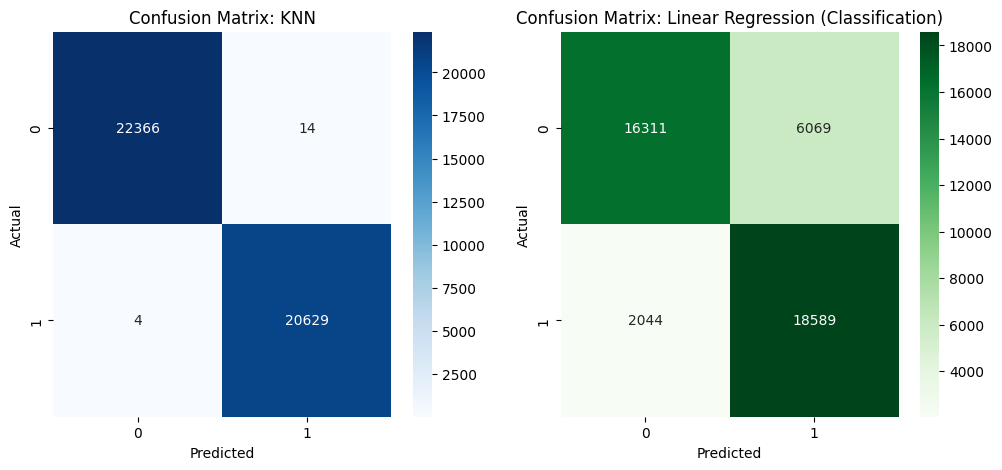

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot Confusion Matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_linear_class), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix: Linear Regression (Classification)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Step.4) Visualizing KNN and Linear Regression


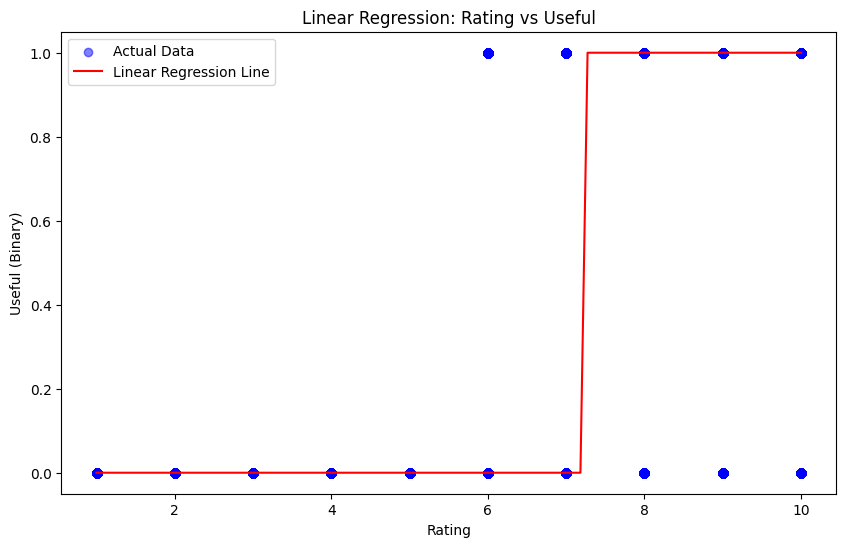

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


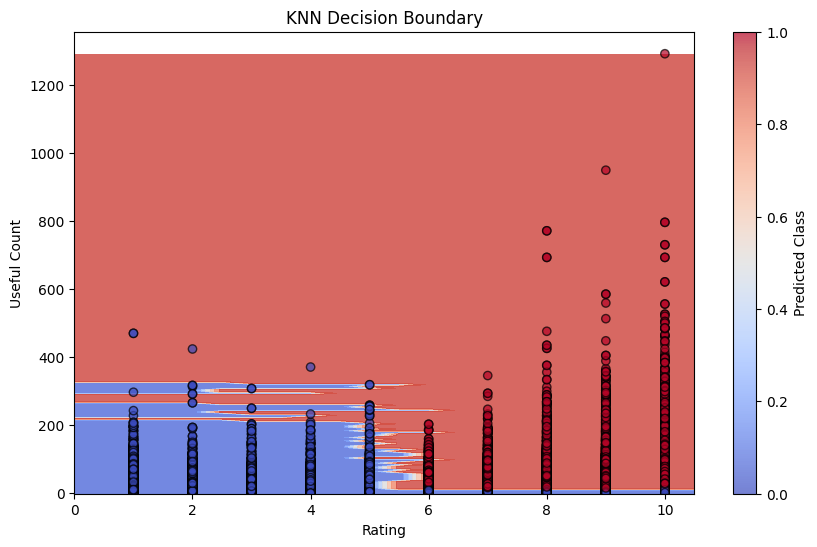

In [ ]:
# Linear Regression Line Plot
plt.figure(figsize=(10, 6))

# Fixed usefulCount value
mean_useful_count = X_train['usefulCount'].mean()

# Generate a range of values for rating
rating_range = np.linspace(X_train['rating'].min(), X_train['rating'].max(), 100)

# Predictions using the regression model
linear_predictions = linear_reg.predict(
    pd.DataFrame({'rating': rating_range, 'usefulCount': mean_useful_count}))

# Convert predictions to binary
linear_predictions_binary = (linear_predictions >= 0.5).astype(int)

# Plot actual data points
plt.scatter(X_train['rating'], y_train, label="Actual Data", alpha=0.5, color='blue')

# Plot the regression line
plt.plot(rating_range, linear_predictions_binary, color='red', label="Linear Regression Line")

plt.title("Linear Regression: Rating vs Useful")
plt.xlabel("Rating")
plt.ylabel("Useful (Binary)")
plt.legend()
plt.show()

# KNN Decision Boundary
plt.figure(figsize=(10, 6))

# Create a grid of rating and usefulCount values
rating_min, rating_max = X_train['rating'].min() - 1, X_train['rating'].max() + 1
useful_count_min, useful_count_max = X_train['usefulCount'].min() - 1, X_train['usefulCount'].max() + 1
xx, yy = np.meshgrid(np.arange(rating_min, rating_max, 0.5),
                     np.arange(useful_count_min, useful_count_max, 5))

# Predict for every point on the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Plot actual data points
plt.scatter(X_train['rating'], X_train['usefulCount'], c=y_train, edgecolor='k', cmap='coolwarm', alpha=0.7)

plt.title("KNN Decision Boundary")
plt.xlabel("Rating")
plt.ylabel("Useful Count")
plt.colorbar(label="Predicted Class")
plt.show()